# 9장. (2)행정구역데이터분석

## 4. 데이터 준비 및 탐색

### 4.1 공공보건의료기관 현황 데이터 준비하기

In [107]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)

import numpy as np

data = pd.read_csv('./공공보건의료기관현황.csv', index_col = 0, encoding = 'utf-8', engine = 'python')

data.head() #작업 확인용 출력

,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


In [108]:
# 주소에서 시도, 군구 정보 분리
addr = pd.DataFrame( data['주소'].apply(lambda v: v.split()[:2]).tolist(), columns = ('시도', '군구'))

addr.head() #작업 확인용 출력

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시


### - 시도 데이터 보정

In [109]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [110]:
addr[addr['시도'] == '창원시']

,시도,군구
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [111]:
addr.iloc[27] = ['경상남도', '창원시']
addr.iloc[31] = ['경상남도', '창원시']

In [112]:
addr.iloc[27] #작업 결과 확인

시도    경상남도
군구     창원시
Name: 27, dtype: object

In [113]:
addr.iloc[31] #작업 결과 확인

시도    경상남도
군구     창원시
Name: 31, dtype: object

In [114]:
addr[addr['시도'] == '경산시']

,시도,군구
47,경산시,경안로


In [115]:
addr.iloc[47] = ['경상북도', '경산시']

In [116]:
addr[addr['시도'] == '천안시']

,시도,군구
209,천안시,동남구
210,천안시,동남구


In [117]:
addr.iloc[209] = ['충청남도', '천안시']
addr.iloc[210] = ['충청남도', '천안시']

In [118]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경북', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충북',
       '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시', '전북',
       '충청북도'], dtype=object)

In [119]:
addr_aliases = { '경기':'경기도', '경남':'경상남도', '경북':'경상북도',
                '충북':'충청북도', '서울시':'서울특별시', '부산특별시':'부산광역시', 
                '대전시':'대전광역시', '충남':'충청남도', '전남':'전라남도', 
                '전북':'전북특별자치도', '전라북도':'전북특별자치도','강원도':'강원특별자치도'}

In [120]:
addr['시도'] = addr['시도'].apply(lambda v: addr_aliases.get(v, v))

In [121]:
print(len(addr["시도"].unique()))
addr['시도'].unique()

16


array(['강원특별자치도', '경기도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도',
       '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전북특별자치도', '충청북도', '서울특별시',
       '충청남도', '울산광역시'], dtype=object)

### - 군구 데이터 보정

In [122]:
print(len(addr["군구"].unique()))
addr['군구'].unique()

133


array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '아란13길', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군',
       '강동구', '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군',
       '양구군', '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구',
       '노원구', '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군',
       '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구',
       '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군',
       '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시',
       '남원시', '군산시', '고창군', '진안군', '제주시', '서귀포시', '천안시', '보령시', '서산시',
       '서천

In [123]:
addr[addr['군구'] == '아란13길']

,시도,군구
75,제주특별자치도,아란13길


In [124]:
addr.iloc[75] = ['제주특별자치도', '제주시']

### 행정구역별 공공보건의료기관의 수 구하기

In [125]:
addr['시도군구'] = addr.apply(lambda r: r['시도'] + ' ' + r['군구'], axis = 1)
print(len(addr["시도군구"]))
print(len(addr["시도군구"].unique()))
addr.head() #작업 확인용 출력

227
140


,시도,군구,시도군구
0,강원특별자치도,춘천시,강원특별자치도 춘천시
1,강원특별자치도,삼척시,강원특별자치도 삼척시
2,강원특별자치도,영월군,강원특별자치도 영월군
3,강원특별자치도,원주시,강원특별자치도 원주시
4,강원특별자치도,강릉시,강원특별자치도 강릉시


In [126]:
addr['count'] = 0
addr.head() #작업 확인용 출력

,시도,군구,시도군구,count
0,강원특별자치도,춘천시,강원특별자치도 춘천시,0
1,강원특별자치도,삼척시,강원특별자치도 삼척시,0
2,강원특별자치도,영월군,강원특별자치도 영월군,0
3,강원특별자치도,원주시,강원특별자치도 원주시,0
4,강원특별자치도,강릉시,강원특별자치도 강릉시,0


In [127]:
addr_group = pd.DataFrame( addr.groupby(['시도', '군구', '시도군구'], as_index = False).count())
addr_group.head() #작업 확인용 출력

,시도,군구,시도군구,count
0,강원특별자치도,강릉시,강원특별자치도 강릉시,4
1,강원특별자치도,동해시,강원특별자치도 동해시,1
2,강원특별자치도,삼척시,강원특별자치도 삼척시,1
3,강원특별자치도,속초시,강원특별자치도 속초시,1
4,강원특별자치도,양구군,강원특별자치도 양구군,1


In [128]:
addr_group = addr_group.set_index("시도군구")
addr_group.to_csv("./addr_group.csv", encoding="utf-8", index=False)
addr_group.head() #작업 확인용 출력

,시도,군구,count
시도군구,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4
강원특별자치도 동해시,강원특별자치도,동해시,1
강원특별자치도 삼척시,강원특별자치도,삼척시,1
강원특별자치도 속초시,강원특별자치도,속초시,1
강원특별자치도 양구군,강원특별자치도,양구군,1


### 4.2 행정구역별 인구수 데이터 준비하기

In [129]:
population = pd.read_excel('./행정구역_시군구_별__성별_인구수_2.xlsx')
population.head() #작업 확인용 출력

,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,합계,51313912,25558944,25754968
1,서울특별시,소계,9384325,4538354,4845971
2,서울특별시,종로구,139378,67240,72138
3,서울특별시,중구,121322,58651,62671
4,서울특별시,용산구,212175,101793,110382


In [130]:
population = population.rename(columns = {'행정구역(시군구)별(1)': '시도', '행정구역(시군구)별(2)': '군구'})
population.head() #작업 확인용 출력

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,합계,51313912,25558944,25754968
1,서울특별시,소계,9384325,4538354,4845971
2,서울특별시,종로구,139378,67240,72138
3,서울특별시,중구,121322,58651,62671
4,서울특별시,용산구,212175,101793,110382


In [131]:
for element in range(0,len(population)):
    population['군구'][element] = population['군구'][element].strip()

In [132]:
population['시도군구'] = population.apply(lambda r: r['시도'] + ' ' + r['군구'], axis = 1)
population.head() #작업 확인용 출력

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
0,전국,합계,51313912,25558944,25754968,전국 합계
1,서울특별시,소계,9384325,4538354,4845971,서울특별시 소계
2,서울특별시,종로구,139378,67240,72138,서울특별시 종로구
3,서울특별시,중구,121322,58651,62671,서울특별시 중구
4,서울특별시,용산구,212175,101793,110382,서울특별시 용산구


In [133]:
population = population[population.군구 != '합계']
population = population[population.군구 != '소계']

In [134]:
population = population.set_index("시도군구")
population.head() #작업 확인용 출력

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,139378,67240,72138
서울특별시 중구,서울특별시,중구,121322,58651,62671
서울특별시 용산구,서울특별시,용산구,212175,101793,110382
서울특별시 성동구,서울특별시,성동구,277090,134390,142700
서울특별시 광진구,서울특별시,광진구,335335,161154,174181


In [135]:
addr_population_merge = pd.merge(addr_group,population, how = 'inner', left_index = True, right_index = True)
addr_population_merge.head() #작업 확인용 출력

,시도_x,군구_x,count,시도_y,군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,강원특별자치도,강릉시,209174,103616,105558
강원특별자치도 동해시,강원특별자치도,동해시,1,강원특별자치도,동해시,88591,45007,43584
강원특별자치도 삼척시,강원특별자치도,삼척시,1,강원특별자치도,삼척시,62309,31645,30664
강원특별자치도 속초시,강원특별자치도,속초시,1,강원특별자치도,속초시,82021,40606,41415
강원특별자치도 양구군,강원특별자치도,양구군,1,강원특별자치도,양구군,20975,10994,9981


In [136]:
local_MC_Population = addr_population_merge[ ['시도_x', '군구_x','count', '총인구수 (명)']]
local_MC_Population.head() #작업 확인용 출력

,시도_x,군구_x,count,총인구수 (명)
시도군구,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,209174
강원특별자치도 동해시,강원특별자치도,동해시,1,88591
강원특별자치도 삼척시,강원특별자치도,삼척시,1,62309
강원특별자치도 속초시,강원특별자치도,속초시,1,82021
강원특별자치도 양구군,강원특별자치도,양구군,1,20975


In [137]:
#컬럼 이름 변경
local_MC_Population = local_MC_Population.rename(columns = {'시도_x':'시도', '군구_x': '군구','총인구수 (명)': '인구수'})
MC_count = local_MC_Population['count']
local_MC_Population['MC_ratio'] = MC_count.div(local_MC_Population['인구수'], axis = 0)*100000

local_MC_Population.head() #작업 확인용 출력

,시도,군구,count,인구수,MC_ratio
시도군구,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,209174,1.912284
강원특별자치도 동해시,강원특별자치도,동해시,1,88591,1.128783
강원특별자치도 삼척시,강원특별자치도,삼척시,1,62309,1.604905
강원특별자치도 속초시,강원특별자치도,속초시,1,82021,1.219200
강원특별자치도 양구군,강원특별자치도,양구군,1,20975,4.767580


## 5. 분석 모델 구축 및 시각화

### 5.1 바 차트 그리기

In [138]:
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
style.use('ggplot')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties( fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

### 행정구역별 공공보건의료기관 수 바 차트

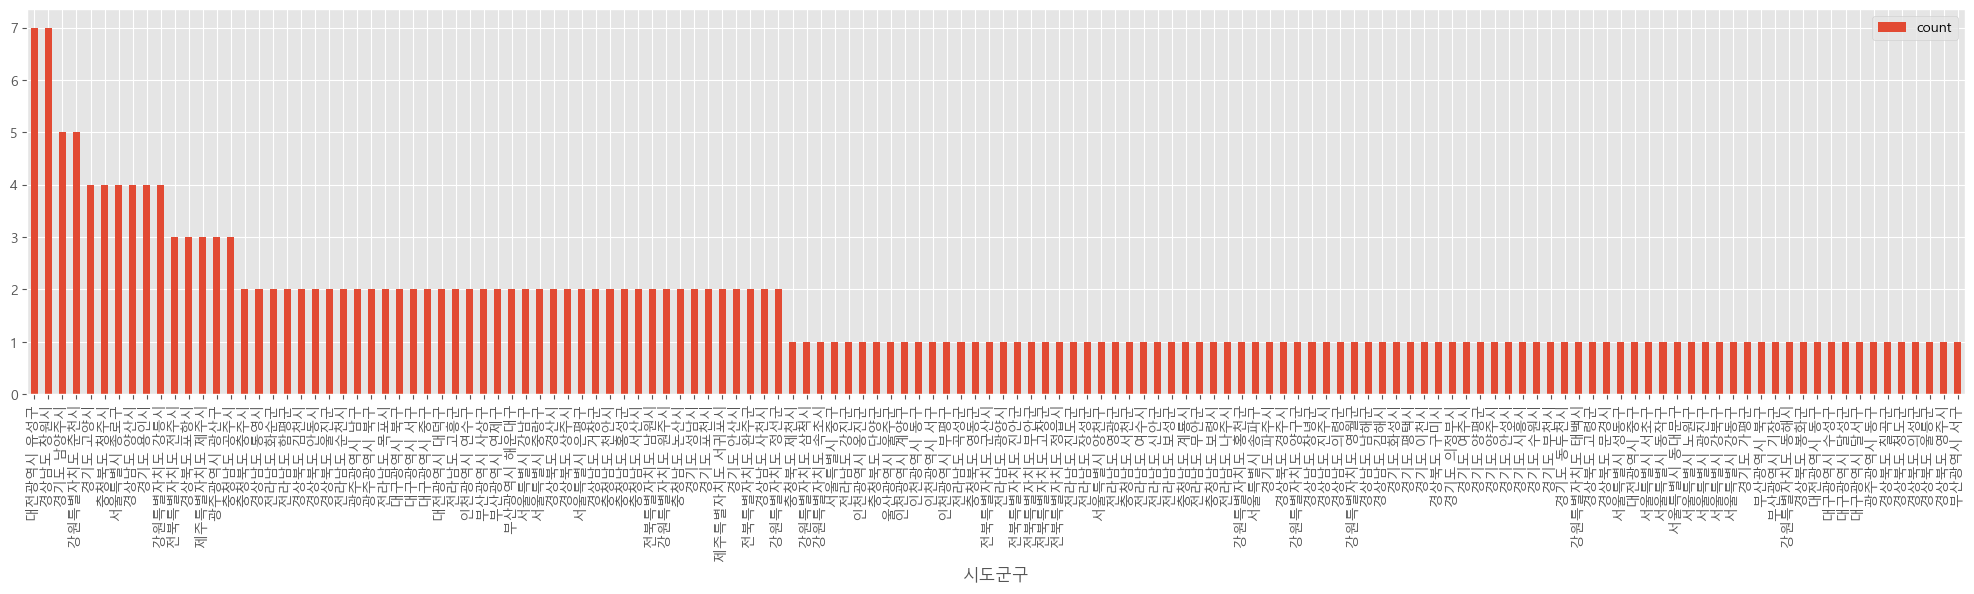

In [139]:
MC_ratio = local_MC_Population[['count']]
MC_ratio = MC_ratio.sort_values('count', ascending = False)
plt.rcParams["figure.figsize"] = (25, 5)
MC_ratio.plot(kind = 'bar', rot = 90)
plt.show()

### 행정구역별로 인구수 대비 공공보건의료기관 비율 바 차트

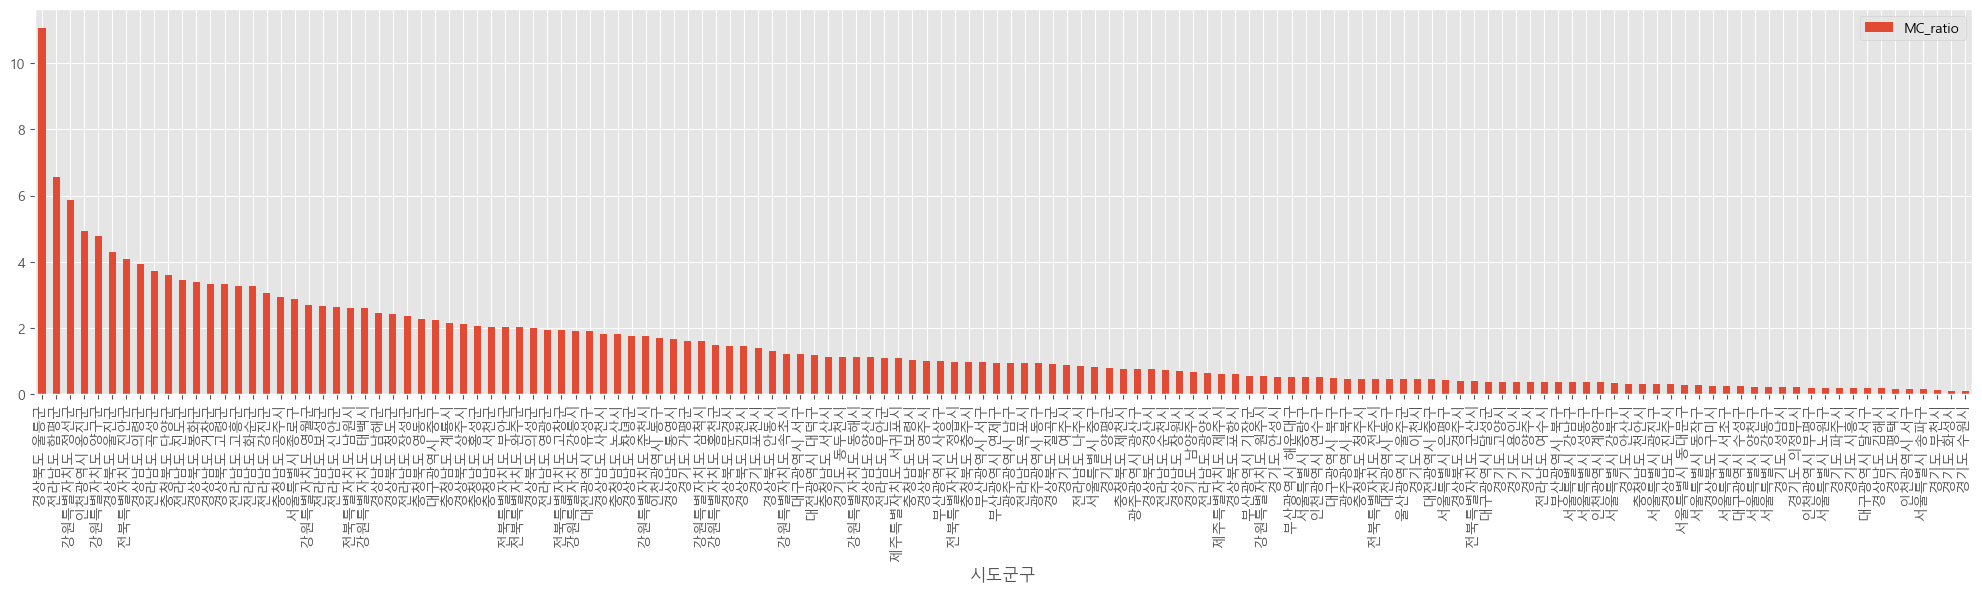

In [140]:
MC_ratio = local_MC_Population[['MC_ratio']]
MC_ratio = MC_ratio.sort_values('MC_ratio', ascending = False)
plt.rcParams["figure.figsize"] = (25, 5)
MC_ratio.plot(kind = 'bar', rot = 90)
plt.show()

## 5.2 블록맵으로 시각화하기

### 1. 데이터 준비하기

In [141]:
import os
path = os.getcwd()

In [142]:
data_draw_korea = pd.read_csv(path+'\\data_draw_korea.csv', index_col = 0, encoding = 'UTF-8', engine = 'python')
data_draw_korea.head() #작업 확인용 출력

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [143]:
#2023년 6월 이후에 변경된 행정구역명으로 수정하기
addr_aliases = { '강원도':'강원특별자치도', '전라북도':'전북특별자치도'}
data_draw_korea['광역시도'] = data_draw_korea['광역시도'].apply(lambda v: addr_aliases.get(v, v))
data_draw_korea.head() #작업 확인용 출력

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원특별자치도,강릉시
1,25589,고성(강원),9,0,664.19,강원특별자치도,고성군
2,86747,동해,11,5,180.01,강원특별자치도,동해시
3,63986,삼척,11,8,1185.80,강원특별자치도,삼척시
4,76733,속초,9,1,105.25,강원특별자치도,속초시


### 2. 행정구역 이름 매핑하기

In [144]:
data_draw_korea['시도군구'] = data_draw_korea.apply(lambda r: r['광역시도'] + ' ' + r['행정구역'], axis = 1)

In [145]:
data_draw_korea = data_draw_korea.set_index("시도군구")

data_draw_korea.head() #작업 확인용 출력

,인구수,shortName,x,y,면적,광역시도,행정구역
시도군구,,,,,,,
강원특별자치도 강릉시,202520,강릉,11,4,1040.07,강원특별자치도,강릉시
강원특별자치도 고성군,25589,고성(강원),9,0,664.19,강원특별자치도,고성군
강원특별자치도 동해시,86747,동해,11,5,180.01,강원특별자치도,동해시
강원특별자치도 삼척시,63986,삼척,11,8,1185.80,강원특별자치도,삼척시
강원특별자치도 속초시,76733,속초,9,1,105.25,강원특별자치도,속초시


In [146]:
data_draw_korea_MC_Population_all = pd.merge(data_draw_korea,local_MC_Population, how = 'outer', 
                                             left_index = True, right_index = True)
data_draw_korea_MC_Population_all.head()

,인구수_x,shortName,x,y,면적,광역시도,행정구역,시도,군구,count,인구수_y,MC_ratio
시도군구,,,,,,,,,,,,
강원특별자치도 강릉시,202520,강릉,11,4,1040.07,강원특별자치도,강릉시,강원특별자치도,강릉시,4.0,209174.0,1.912284
강원특별자치도 고성군,25589,고성(강원),9,0,664.19,강원특별자치도,고성군,NaN,NaN,NaN,NaN,NaN
강원특별자치도 동해시,86747,동해,11,5,180.01,강원특별자치도,동해시,강원특별자치도,동해시,1.0,88591.0,1.128783
강원특별자치도 삼척시,63986,삼척,11,8,1185.80,강원특별자치도,삼척시,강원특별자치도,삼척시,1.0,62309.0,1.604905
강원특별자치도 속초시,76733,속초,9,1,105.25,강원특별자치도,속초시,강원특별자치도,속초시,1.0,82021.0,1.219200


### 3. 블록맵으로 시각화하기

In [147]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [ (2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9),
    (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
    (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
    (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
    (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
    (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [ (19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], #광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [ (16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], #부산시
]

In [148]:
def draw_blockMap(blockedMap, targetData, title, color):
    whitelabelmin = ( max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])
    datalabel = targetData
    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    mapdata = blockedMap.pivot(index = 'y', columns = 'x', values = targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize = (8, 13))
    plt.title(title)
    plt.pcolor( masked_mapdata, vmin = vmin, vmax = vmax, cmap = color, edgecolor = '#aaaaaa', linewidth = 0.5)
    #지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        #광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시
        if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'):
            dispname = ' {}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1])
            if len(row['행정구역']) <= 2:
                dispname += row['행정구역'][-1]
        else:
            dispname = row['행정구역'][:-1]
            
        #서대문구, 서귀포시 같이 이름이 3자 이상이면 작은 글자로 표시
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2
            
            plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight = 'bold',fontsize = fontsize, 
                         ha = 'center', va = 'center', color = annocolor, linespacing = linespacing)

    #시도 경계를 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c = 'black', lw = 4)
        
    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)
    plt.axis('off')
    
    cb = plt.colorbar(shrink = 1, aspect = 10)
    cb.set_label(datalabel)
    
    plt.tight_layout()
    plt.savefig('.\\' + 'blockMap_' + targetData + '.png')
    plt.show()

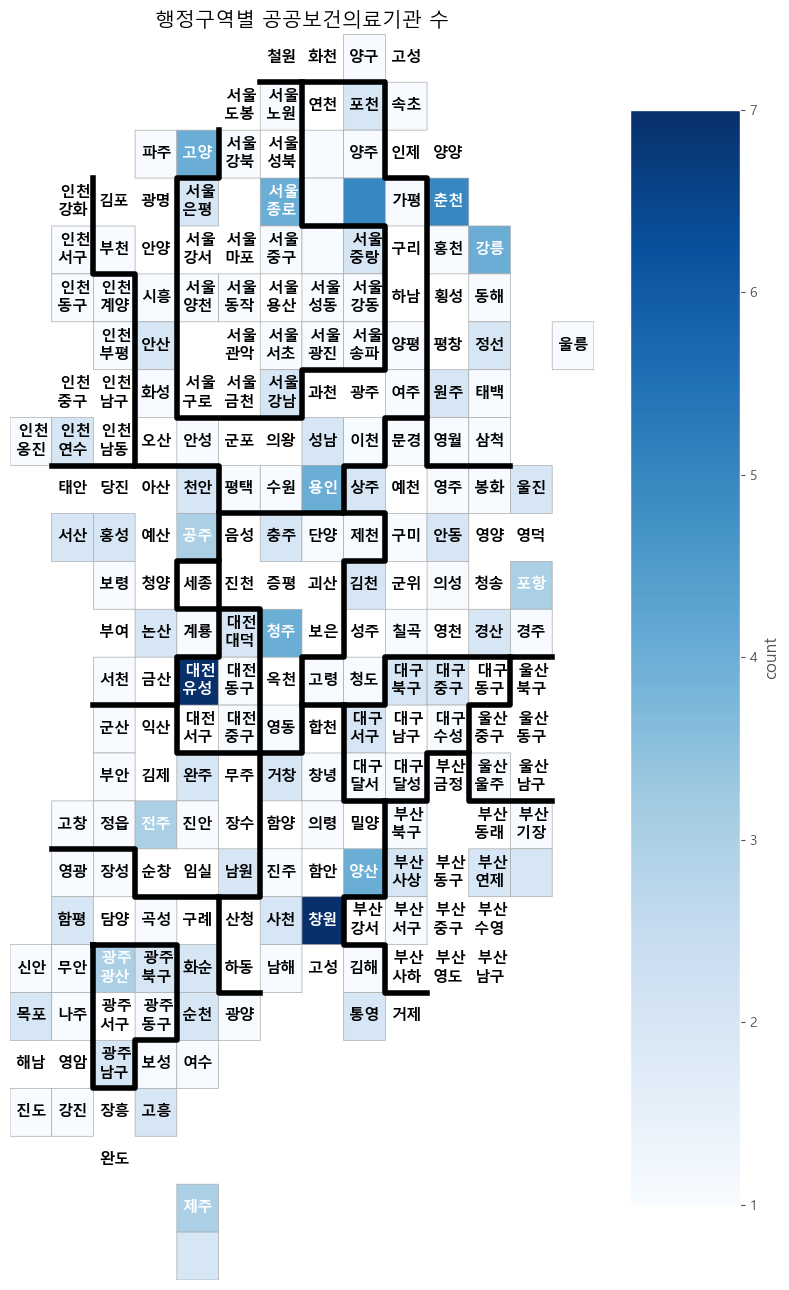

In [149]:
draw_blockMap(data_draw_korea_MC_Population_all, 'count', '행정구역별 공공보건의료기관 수', 'Blues')

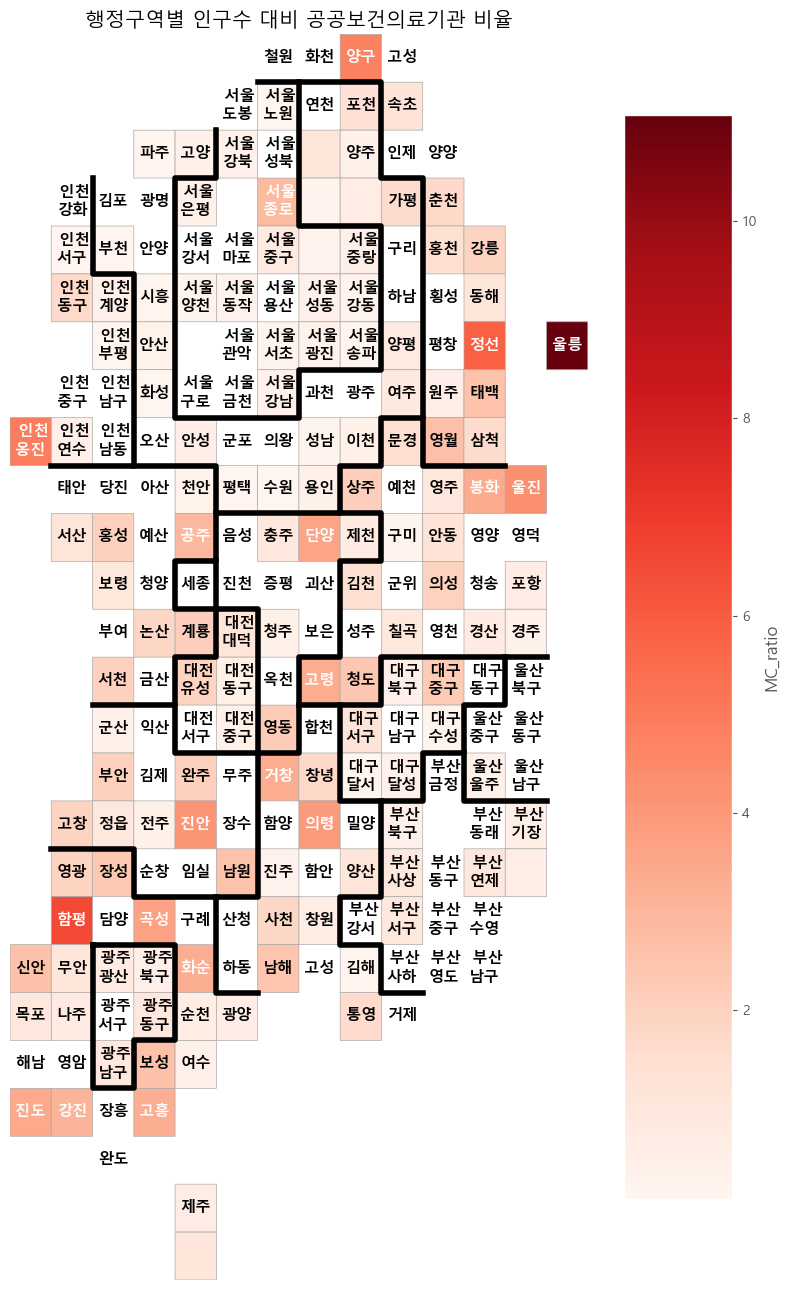

In [150]:
draw_blockMap( data_draw_korea_MC_Population_all, 'MC_ratio', '행정구역별 인구수 대비 공공보건의료기관 비율', 'Reds')